In [3]:
!ls ../dataset/toto


4D.zip      5D.zip      6D.zip      Toto650.zip Toto655.zip Toto658.zip


In [39]:
import numpy as np
import pandas as pd
import datetime
import calendar

#pd.read_csv?

df_4d = pd.read_csv('../dataset/toto/4D.zip', dtype=str)

#df_4d['DrawDate_Formatted'] = pd.to_datetime(df_4d['DrawDate'], format='%Y%m%d')
#df_4d.head()
#df_4d = df_4d.loc[df['DrawDate_Formatted'] >= '2018-01-01']
#df_4d.melt?

df_4d = df_4d.melt(id_vars=["DrawNo", "DrawDate"], var_name="PrizeType", value_name="No")
df_4d = df_4d.sort_values(["DrawNo", "DrawDate", "PrizeType"])
df_4d['DrawDateFormated'] = pd.to_datetime(df_4d['DrawDate'], format='%Y%m%d')


def set_prize_type(row):
    if row['PrizeType'] == '1stPrizeNo':
        return 1
    elif row['PrizeType'] == '2ndPrizeNo':
        return 2
    elif row['PrizeType'] == '3rdPrizeNo':
        return 3
    elif row['PrizeType'].startswith('Special'):
        return 4
    elif row['PrizeType'].startswith('Consolation'):
        return 5
    else:
        return 0

def get_week_day(row):
    return row['DrawDateFormated'].weekday()
    #return calendar.day_name[row['DrawDateFormated'].weekday()]
    
df_4d['PrizeTypeFormatted'] = df_4d.apply(set_prize_type, axis=1)
df_4d['DrawWeekDay'] = df_4d.apply(get_week_day, axis=1)

#df_4d = df_4d.set_index(['DrawNo', 'DrawDate'])

df_4d.head(10)
#df_4d.count

,DrawNo,DrawDate,PrizeType,No,DrawDateFormated,PrizeTypeFormatted,DrawWeekDay
0,040792,19920506,1stPrizeNo,0019,1992-05-06,1,2
4368,040792,19920506,2ndPrizeNo,1124,1992-05-06,2,2
8736,040792,19920506,3rdPrizeNo,0592,1992-05-06,3,2
56784,040792,19920506,ConsolationNo1,5311,1992-05-06,5,2
96096,040792,19920506,ConsolationNo10,0407,1992-05-06,5,2
61152,040792,19920506,ConsolationNo2,1949,1992-05-06,5,2
65520,040792,19920506,ConsolationNo3,1606,1992-05-06,5,2
69888,040792,19920506,ConsolationNo4,3775,1992-05-06,5,2
74256,040792,19920506,ConsolationNo5,6226,1992-05-06,5,2
78624,040792,19920506,ConsolationNo6,1271,1992-05-06,5,2


<IPython.core.display.Javascript object>


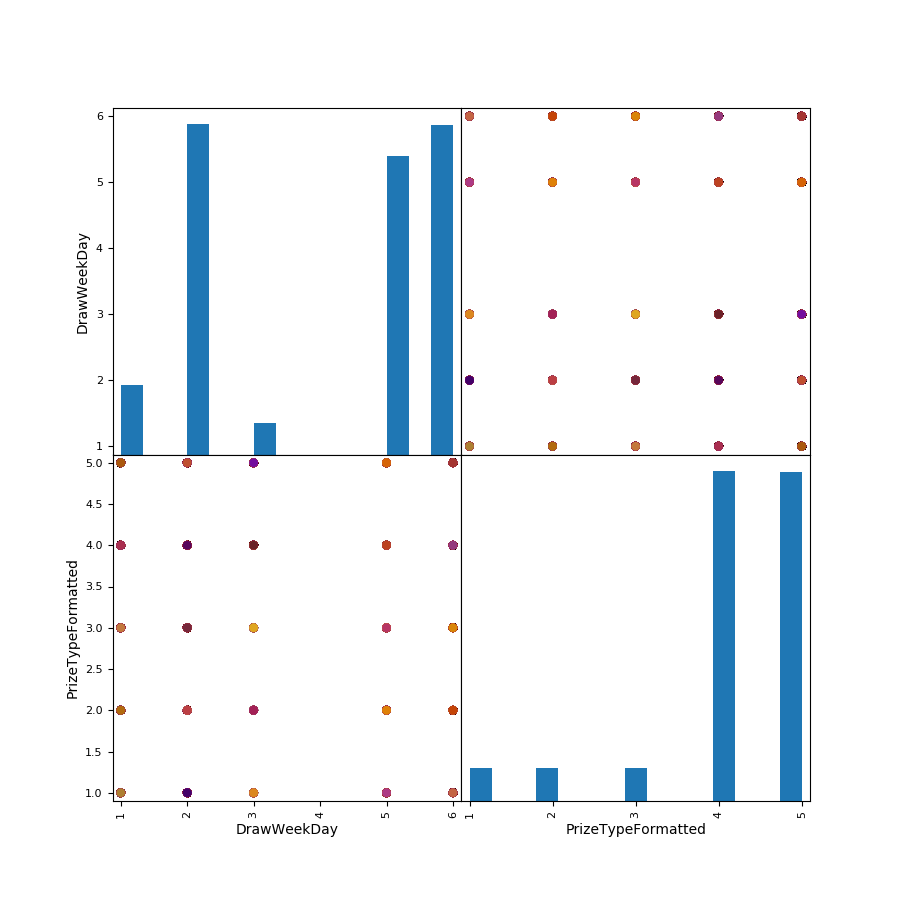

In [67]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

from matplotlib import cm

X = df_4d[['DrawNo','DrawWeekDay', 'PrizeTypeFormatted']]
y = df_4d['No']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)


In [71]:
# K Nearest Neighbor
X = df_4d[['DrawWeekDay', 'PrizeTypeFormatted']]
y = df_4d['No']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)
knn.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
knn.score(X_test, y_test)

0.00019907628603280778

In [2]:
import pandas as pd

df_ticker = pd.read_csv('../dataset/ticker.csv', dtype=str)
#print(df_ticker.count())
df_ticker = df_ticker.loc[df_ticker['Exchange'] == 'KLS']
#print(df_ticker.count())
df_ticker.head()


,Ticker,Name,Exchange,Category Name,Country
892,6599.KL,Aeon Co. (M) Bhd,KLS,NaN,Malaysia
1524,5099.KL,AirAsia Berhad,KLS,NaN,Malaysia
1991,7579.KL,AWC Berhad,KLS,NaN,Malaysia
1992,7162.KL,Astino Berhad,KLS,NaN,Malaysia
1994,6432.KL,Apollo Food Holdings Berhad,KLS,NaN,Malaysia


In [151]:
from IPython.core.interactiveshell import InteractibveShell
InteractiveShell.ast_node_interactivity = "all"

In [19]:
import numpy as np
df_kls_dividends = pd.read_csv('../dataset/kls_dividend_yields.csv')
df_kls_dividends.sort_values(['symbol', 'date'])
df_kls_dividends['year'] = pd.DatetimeIndex(df_kls_dividends['formatted_date']).year
df_kls_dividends.dtypes

symbol             object
date                int64
amount            float64
data              float64
formatted_date     object
type               object
year                int64
dtype: object

In [18]:
df_div_summary = df_kls_dividends.groupby(['symbol','year']).agg({'amount': np.sum})
df_div_summary = df_div_summary.reset_index()
df_div_summary.dtypes

symbol     object
year        int64
amount    float64
dtype: object

#### Equities with dividends in last 5 years - 2014 to 2018

In [103]:
#df_div_summary.columns.tolist()
import datetime as dt
now = dt.datetime.now()
current_year = now.year

# Past 5 years, not incluing current year
last_5_years = np.arange(current_year, current_year-5, -1)
print(last_5_years)

df_good_equities = df_div_summary.where(df_div_summary['year'].isin(last_5_years)).dropna()
df_good_equities.year = df_good_equities.year.astype(int)
df_good_equities.head(10)

[2018 2017 2016 2015 2014]


,symbol,year,amount
0,0001.KL,2016,0.0040
1,0002.KL,2017,0.0400
2,0002.KL,2018,0.0200
5,0008.KL,2014,0.0200
6,0008.KL,2015,0.0200
7,0008.KL,2016,0.0200
8,0008.KL,2017,0.0200
11,0011.KL,2014,0.0063
12,0011.KL,2015,0.0189
13,0011.KL,2016,0.0136


#### Get the equities name

In [104]:
df_good_equities = pd.merge(df_good_equities, df_ticker, how='left', left_on='symbol', right_on='Ticker')
df_good_equities.head(10)

,symbol,year,amount,Ticker,Name,Exchange,Category Name,Country
0,0001.KL,2016,0.0040,0001.KL,SUPERCOMNET TECHNOLOGIES BHD,KLS,NaN,Malaysia
1,0002.KL,2017,0.0400,0002.KL,KOTRA INDUSTRIES BHD,KLS,NaN,Malaysia
2,0002.KL,2018,0.0200,0002.KL,KOTRA INDUSTRIES BHD,KLS,NaN,Malaysia
3,0008.KL,2014,0.0200,0008.KL,WILLOWGLEN MSC BHD,KLS,NaN,Malaysia
4,0008.KL,2015,0.0200,0008.KL,WILLOWGLEN MSC BHD,KLS,NaN,Malaysia
5,0008.KL,2016,0.0200,0008.KL,WILLOWGLEN MSC BHD,KLS,NaN,Malaysia
6,0008.KL,2017,0.0200,0008.KL,WILLOWGLEN MSC BHD,KLS,NaN,Malaysia
7,0011.KL,2014,0.0063,0011.KL,BRITE-TECH BHD,KLS,NaN,Malaysia
8,0011.KL,2015,0.0189,0011.KL,BRITE-TECH BHD,KLS,NaN,Malaysia
9,0011.KL,2016,0.0136,0011.KL,BRITE-TECH BHD,KLS,NaN,Malaysia


In [105]:
df_good_equities.drop(['Exchange', 'Category Name', 'Country', 'Ticker'], axis=1, inplace=True)
df_good_equities.head(10)

,symbol,year,amount,Name
0,0001.KL,2016,0.0040,SUPERCOMNET TECHNOLOGIES BHD
1,0002.KL,2017,0.0400,KOTRA INDUSTRIES BHD
2,0002.KL,2018,0.0200,KOTRA INDUSTRIES BHD
3,0008.KL,2014,0.0200,WILLOWGLEN MSC BHD
4,0008.KL,2015,0.0200,WILLOWGLEN MSC BHD
5,0008.KL,2016,0.0200,WILLOWGLEN MSC BHD
6,0008.KL,2017,0.0200,WILLOWGLEN MSC BHD
7,0011.KL,2014,0.0063,BRITE-TECH BHD
8,0011.KL,2015,0.0189,BRITE-TECH BHD
9,0011.KL,2016,0.0136,BRITE-TECH BHD


In [106]:
df_good_equities.rename(columns={'Name': 'name'}, inplace=True)
df_good_equities.head(10)

,symbol,year,amount,name
0,0001.KL,2016,0.0040,SUPERCOMNET TECHNOLOGIES BHD
1,0002.KL,2017,0.0400,KOTRA INDUSTRIES BHD
2,0002.KL,2018,0.0200,KOTRA INDUSTRIES BHD
3,0008.KL,2014,0.0200,WILLOWGLEN MSC BHD
4,0008.KL,2015,0.0200,WILLOWGLEN MSC BHD
5,0008.KL,2016,0.0200,WILLOWGLEN MSC BHD
6,0008.KL,2017,0.0200,WILLOWGLEN MSC BHD
7,0011.KL,2014,0.0063,BRITE-TECH BHD
8,0011.KL,2015,0.0189,BRITE-TECH BHD
9,0011.KL,2016,0.0136,BRITE-TECH BHD


In [108]:
df_good_equities = df_good_equities[['symbol', 'name', 'amount', 'year']]
df_good_equities.head(10)

,symbol,name,amount,year
0,0001.KL,SUPERCOMNET TECHNOLOGIES BHD,0.0040,2016
1,0002.KL,KOTRA INDUSTRIES BHD,0.0400,2017
2,0002.KL,KOTRA INDUSTRIES BHD,0.0200,2018
3,0008.KL,WILLOWGLEN MSC BHD,0.0200,2014
4,0008.KL,WILLOWGLEN MSC BHD,0.0200,2015
5,0008.KL,WILLOWGLEN MSC BHD,0.0200,2016
6,0008.KL,WILLOWGLEN MSC BHD,0.0200,2017
7,0011.KL,BRITE-TECH BHD,0.0063,2014
8,0011.KL,BRITE-TECH BHD,0.0189,2015
9,0011.KL,BRITE-TECH BHD,0.0136,2016


#### Equities with dividend yields in the last 5 years

In [109]:
len(df_good_equities.symbol.unique())

601

### With returns in last 3 years excluding current

In [110]:
last_3_years = np.arange(current_year, current_year-4, -1)
print(last_3_years)
df_shortlisted = df_good_equities.where(df_good_equities['year'].isin(last_3_years)).dropna()
df_shortlisted.year = df_shortlisted.year.astype(int)
group_by = df_shortlisted.groupby('symbol')
df_selected_equities = group_by.filter(lambda x: len(x) > 2) 
df_selected_equities.to_csv('../dataset/KLS_selected_equities.csv', encoding='utf-8', index=False, float_format='%g')
df_selected_equities.head(10)

[2018 2017 2016 2015]


,symbol,name,amount,year
4,0008.KL,WILLOWGLEN MSC BHD,0.0200,2015
5,0008.KL,WILLOWGLEN MSC BHD,0.0200,2016
6,0008.KL,WILLOWGLEN MSC BHD,0.0200,2017
8,0011.KL,BRITE-TECH BHD,0.0189,2015
9,0011.KL,BRITE-TECH BHD,0.0136,2016
10,0011.KL,BRITE-TECH BHD,0.0160,2017
12,0012.KL,THREE-A RESOURCES BHD,0.0140,2015
13,0012.KL,THREE-A RESOURCES BHD,0.0180,2016
14,0012.KL,THREE-A RESOURCES BHD,0.0180,2017
15,0023.KL,IFCA MSC BHD,0.0100,2015


### Number of equities with yields from 2015 to 2018 (optional)

In [111]:
len(df_selected_equities.symbol.unique())

408

### Clustering on the selected equities

#### Get the current prices

In [262]:
df_financials = pd.read_csv('../dataset/KLS_current_price.csv')
df_financials.set_index(['symbol'], inplace=True)
# df_financials.head(10)
df_financials.columns


Index(['algorithm', 'ask', 'askSize', 'averageDailyVolume10Day',
       'averageVolume', 'averageVolume10days', 'beta', 'bid', 'bidSize',
       'circulatingSupply', 'currency', 'dayHigh', 'dayLow', 'dividendRate',
       'dividendYield', 'exDividendDate', 'expireDate', 'fiftyDayAverage',
       'fiftyTwoWeekHigh', 'fiftyTwoWeekLow', 'fiveYearAvgDividendYield',
       'forwardPE', 'fromCurrency', 'lastMarket', 'marketCap', 'maxAge',
       'maxSupply', 'navPrice', 'open', 'openInterest', 'payoutRatio',
       'previousClose', 'priceHint', 'priceToSalesTrailing12Months',
       'regularMarketDayHigh', 'regularMarketDayLow', 'regularMarketOpen',
       'regularMarketPreviousClose', 'regularMarketVolume', 'startDate',
       'strikePrice', 'totalAssets', 'tradeable', 'trailingAnnualDividendRate',
       'trailingAnnualDividendYield', 'trailingPE', 'twoHundredDayAverage',
       'volume', 'volume24Hr', 'volumeAllCurrencies', 'yield', 'ytdReturn'],
      dtype='object')

In [263]:
df_financials = df_financial[['symbol', 'previousClose', 'open', 'trailingPE', 'volume']]
df_financials.head(10)

,symbol,previousClose,open,trailingPE,volume
0,0008.KL,0.550,0.550,NaN,131500
1,0011.KL,0.240,0.250,NaN,80000
2,0012.KL,0.940,0.940,NaN,147300
3,0023.KL,0.280,0.280,NaN,496600
4,0035.KL,0.825,0.825,NaN,4150200
5,0037.KL,0.245,0.250,NaN,1385000
6,0049.KL,0.655,0.655,NaN,922600
7,0050.KL,0.230,0.230,NaN,185000
8,0054.KL,0.170,0.170,NaN,174100
9,0058.KL,1.700,1.700,NaN,13100


#### Join the datasets and calculate the yearly return in %

In [264]:
df_analysis = pd.merge(df_selected_equities, df_financials, how='left', left_on='symbol', right_on='symbol')
df_analysis['yield_return'] = df_analysis['amount'] / df_analysis['previousClose'] * 100
df_analysis = df_analysis.round({'yield_return':2})
# df_analysis = df_analysis.query('yield_return > 5')
# df_analysis = df_analysis[df_analysis.name.str.contains('media', case=False)]
df_analysis.head(10)
#len(df_analysis)

,symbol,name,amount,year,previousClose,open,trailingPE,volume,yield_return
0,0008.KL,WILLOWGLEN MSC BHD,0.0200,2015,0.55,0.55,NaN,131500,3.64
1,0008.KL,WILLOWGLEN MSC BHD,0.0200,2016,0.55,0.55,NaN,131500,3.64
2,0008.KL,WILLOWGLEN MSC BHD,0.0200,2017,0.55,0.55,NaN,131500,3.64
3,0011.KL,BRITE-TECH BHD,0.0189,2015,0.24,0.25,NaN,80000,7.88
4,0011.KL,BRITE-TECH BHD,0.0136,2016,0.24,0.25,NaN,80000,5.67
5,0011.KL,BRITE-TECH BHD,0.0160,2017,0.24,0.25,NaN,80000,6.67
6,0012.KL,THREE-A RESOURCES BHD,0.0140,2015,0.94,0.94,NaN,147300,1.49
7,0012.KL,THREE-A RESOURCES BHD,0.0180,2016,0.94,0.94,NaN,147300,1.91
8,0012.KL,THREE-A RESOURCES BHD,0.0180,2017,0.94,0.94,NaN,147300,1.91
9,0023.KL,IFCA MSC BHD,0.0100,2015,0.28,0.28,NaN,496600,3.57


#### Derive a numeric symbol id

In [265]:
df_analysis['symbol_id'] = df_analysis.groupby('symbol').ngroup()
df_analysis.head(10)

,symbol,name,amount,year,previousClose,open,trailingPE,volume,yield_return,symbol_id
0,0008.KL,WILLOWGLEN MSC BHD,0.0200,2015,0.55,0.55,NaN,131500,3.64,0
1,0008.KL,WILLOWGLEN MSC BHD,0.0200,2016,0.55,0.55,NaN,131500,3.64,0
2,0008.KL,WILLOWGLEN MSC BHD,0.0200,2017,0.55,0.55,NaN,131500,3.64,0
3,0011.KL,BRITE-TECH BHD,0.0189,2015,0.24,0.25,NaN,80000,7.88,1
4,0011.KL,BRITE-TECH BHD,0.0136,2016,0.24,0.25,NaN,80000,5.67,1
5,0011.KL,BRITE-TECH BHD,0.0160,2017,0.24,0.25,NaN,80000,6.67,1
6,0012.KL,THREE-A RESOURCES BHD,0.0140,2015,0.94,0.94,NaN,147300,1.49,2
7,0012.KL,THREE-A RESOURCES BHD,0.0180,2016,0.94,0.94,NaN,147300,1.91,2
8,0012.KL,THREE-A RESOURCES BHD,0.0180,2017,0.94,0.94,NaN,147300,1.91,2
9,0023.KL,IFCA MSC BHD,0.0100,2015,0.28,0.28,NaN,496600,3.57,3


#### Clustering

1418.1754022217283


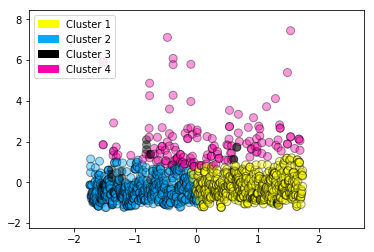

In [327]:
### K Mean Clustering
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X_symbols = df_analysis[['symbol_id', 'yield_return', 'volume']]

#df_analysis.dtypes

X_symbols_normalized = StandardScaler().fit(X_symbols).transform(X_symbols)  

# print(X_symbols.as_matrix())
# print(X_symbols_normalized)

kmeans = KMeans(n_clusters = 4)
kmeans.fit(X_symbols_normalized)
print(kmeans.inertia_)

#kmeans.fit(X_symbols.as_matrix())

plot_labelled_scatter(X_symbols_normalized, kmeans.labels_, 
                      ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])



#### Show clusters info

In [328]:
df_analysis['cluster'] = kmeans.labels_
print(kmeans.labels_)
print(len(df_analysis.query('cluster == 0')))
print(len(df_analysis.query('cluster == 1')))
print(len(df_analysis.query('cluster == 2')))
print(len(df_analysis.query('cluster == 3')))
print(len(df_analysis.query('cluster == 4')))
print(len(df_analysis.query('cluster == 5')))
print(len(df_analysis.query('cluster == 6')))

df_analysis.query('cluster == 1').head(10)

[1 1 1 ... 0 0 0]
561
535
31
153
0
0
0


,symbol,name,amount,year,previousClose,open,trailingPE,volume,yield_return,symbol_id,cluster
0,0008.KL,WILLOWGLEN MSC BHD,0.0200,2015,0.55,0.55,NaN,131500,3.64,0,1
1,0008.KL,WILLOWGLEN MSC BHD,0.0200,2016,0.55,0.55,NaN,131500,3.64,0,1
2,0008.KL,WILLOWGLEN MSC BHD,0.0200,2017,0.55,0.55,NaN,131500,3.64,0,1
3,0011.KL,BRITE-TECH BHD,0.0189,2015,0.24,0.25,NaN,80000,7.88,1,1
4,0011.KL,BRITE-TECH BHD,0.0136,2016,0.24,0.25,NaN,80000,5.67,1,1
5,0011.KL,BRITE-TECH BHD,0.0160,2017,0.24,0.25,NaN,80000,6.67,1,1
6,0012.KL,THREE-A RESOURCES BHD,0.0140,2015,0.94,0.94,NaN,147300,1.49,2,1
7,0012.KL,THREE-A RESOURCES BHD,0.0180,2016,0.94,0.94,NaN,147300,1.91,2,1
8,0012.KL,THREE-A RESOURCES BHD,0.0180,2017,0.94,0.94,NaN,147300,1.91,2,1
9,0023.KL,IFCA MSC BHD,0.0100,2015,0.28,0.28,NaN,496600,3.57,3,1


### Agglomomerative clustering

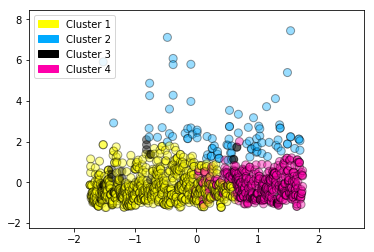

In [329]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from adspy_shared_utilities import plot_labelled_scatter

 
cls = AgglomerativeClustering(n_clusters = 4)
cls_assignment = cls.fit_predict(X_symbols_normalized)

plot_labelled_scatter(X_symbols_normalized, cls_assignment, ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

In [ ]:
### Heatmap



#### Save clustered symbols to file

In [331]:
df_analysis.to_csv('../dataset/KLS_clustered_equities.csv', encoding='utf-8', index=False, float_format='%g')

#### Load clustered equities

In [79]:
import pandas as pd
import numpy as np

df_clustered_equities = pd.read_csv('../dataset/KLS_clustered_equities.csv')
df_clustered_equities.groupby(['cluster']).symbol.nunique()
#df_clustered_equities.groupby(['cluster'])['symbol'].agg(['count'])
#df_clustered_equities.groupby(['cluster', 'symbol', 'name'])['symbol'].agg(['count'])
#df_summarized = df_clustered_equities.groupby(['cluster', 'symbol', 'name'])['symbol'].agg(['count'])
#df_summarized.reset_index().symbol.unique()
#df_clustered_equities.query('cluster == 0').symbol.unique()
#df_clustered_equities.query('cluster == 3').head(50)

cluster
0    200
1    188
2     10
3     88
Name: symbol, dtype: int64